# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

from datetime import datetime

import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow_privacy
from sklearn.metrics import mean_squared_error, mean_absolute_error,median_absolute_error
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy



from Funciones_TesisV1 import LSTM_CON_PD
from Funciones_TesisV1 import LSTM_SIN_DP

# Abrir archivos

In [3]:
df = pd.read_csv("C:\\Users\\jd.pradal\\OneDrive - Universidad de los andes\\Documentos\\Maestría\\TESIS JUAN DIEGO PRADA\\Tesis 2\\Código\\Descarga Datos K\\Hourly Energy Consumption\\archiv\\AEP_hourly.csv")


df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.sort_values(by='Datetime',inplace = True)
df.reset_index(drop=True, inplace=True)

## Graficar datos

<function matplotlib.pyplot.show(close=None, block=None)>

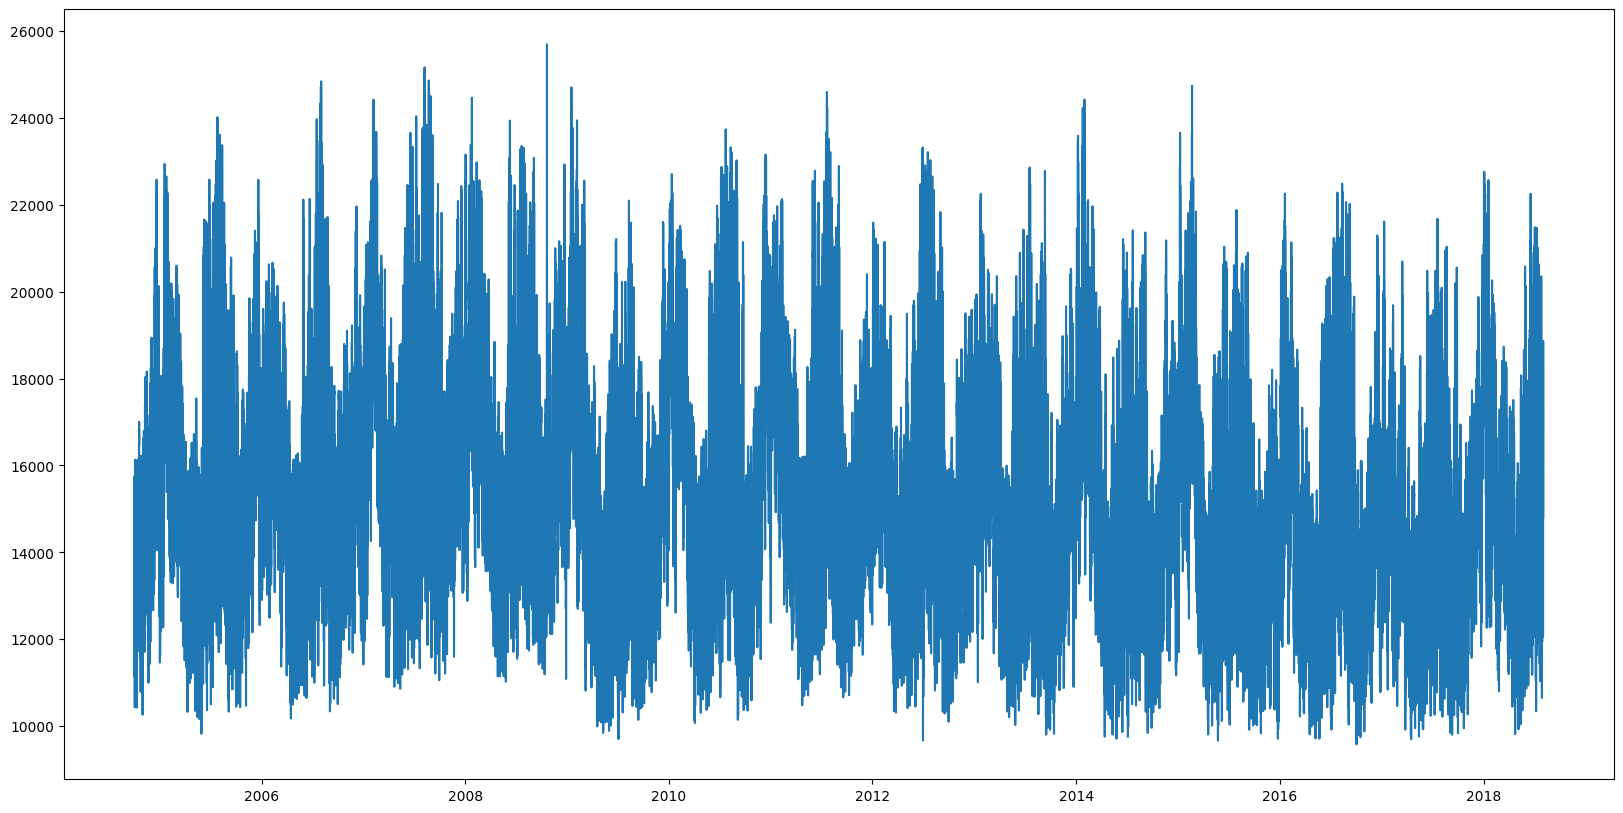

In [4]:
n = 69
n2 = 168*4
plt.figure(figsize=(20,10))
#sns.lineplot(data = df, x = "Datetime",y = "AEP_MW")
plt.plot(df['Datetime'][:], df['AEP_MW'][:])
plt.show

## Seleccionar datos para modelo

<function matplotlib.pyplot.show(close=None, block=None)>

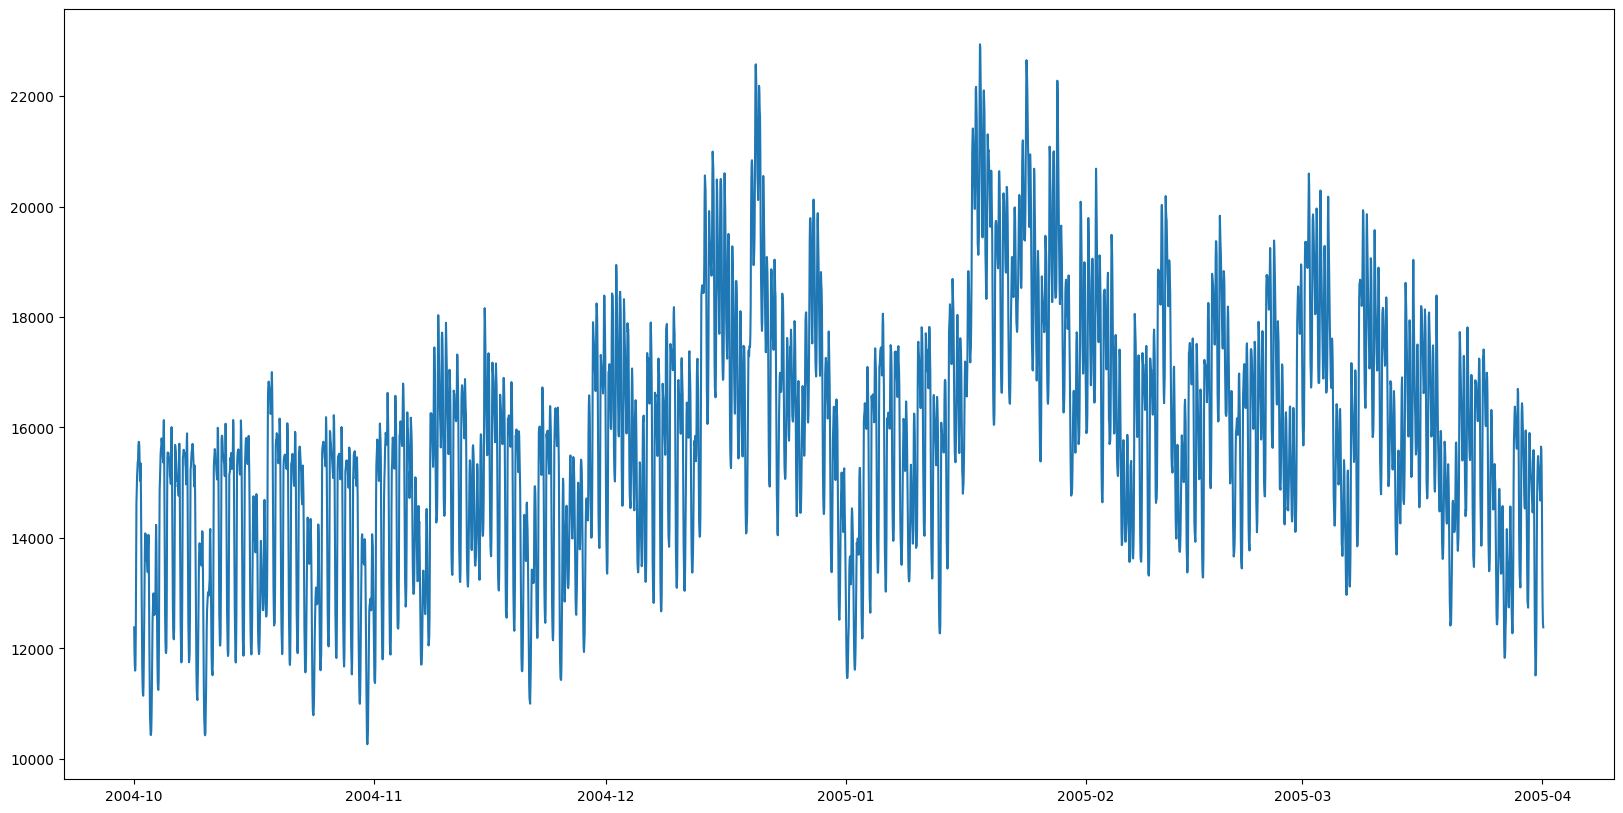

In [5]:
dfModelo = df.iloc[:4370,:]

plt.figure(figsize=(20,10))
plt.plot(dfModelo['Datetime'][:], dfModelo['AEP_MW'][:])
plt.show

In [6]:
datos = dfModelo['AEP_MW'].to_numpy()
fechas = dfModelo['Datetime'].to_numpy()
datos = datos.reshape(-1,1)


In [7]:
# len(X_train)*0.8/batch

In [13]:
# Parámetros

nodos1 = 50
nodos2 = 50
lr = 0.0001
paciencia = 15
epocas = 80
batch  = 32
window_size = 168
t_pridiccion = 24

l2_norm_clip = 0
noise_multiplier = 10
num_microbatches = 4
learning_rate = 0.0001





In [25]:
historySPD, y_hatSPD,y_test1SPD,fecha_y_testSPD, MAES_SPD,RMSE_SPD,ER_Medianos_SPD,ER_Medios_SPD = LSTM_SIN_DP(datos,fechas,nodos1,nodos2,paciencia,epocas,batch,window_size,t_pridiccion,learning_rate)

Epoch 1/32
18/18 [==============================] - 4s 125ms/step - loss: 0.1197 - val_loss: 0.0723
Epoch 2/32
18/18 [==============================] - 2s 95ms/step - loss: 0.0382 - val_loss: 0.0239
Epoch 3/32
18/18 [==============================] - 2s 101ms/step - loss: 0.0273 - val_loss: 0.0153
Epoch 4/32
18/18 [==============================] - 2s 105ms/step - loss: 0.0209 - val_loss: 0.0151
Epoch 5/32
18/18 [==============================] - 2s 97ms/step - loss: 0.0191 - val_loss: 0.0160
Epoch 6/32
18/18 [==============================] - 2s 111ms/step - loss: 0.0189 - val_loss: 0.0166
Epoch 7/32
18/18 [==============================] - 2s 103ms/step - loss: 0.0185 - val_loss: 0.0169
Epoch 8/32
18/18 [==============================] - 2s 88ms/step - loss: 0.0181 - val_loss: 0.0170
Epoch 9/32
18/18 [==============================] - 2s 92ms/step - loss: 0.0177 - val_loss: 0.0170
Epoch 10/32
18/18 [==============================] - 2s 91ms/step - loss: 0.0175 - val_loss: 0.0170
Epoc

In [14]:
historyCPD, y_hatCPD,y_test1CPD,fecha_y_testCPD, MAES_CPD,RMSE_CPD,ER_Medianos_CPD,ER_Medios_CPD = LSTM_CON_PD(datos,fechas,nodos1,nodos2,paciencia,epocas,batch,window_size,t_pridiccion,l2_norm_clip,noise_multiplier,num_microbatches,learning_rate)

Epoch 1/80
94/94 [==============================] - 10s 54ms/step - loss: 0.2160 - val_loss: 0.2568
Epoch 2/80
94/94 [==============================] - 5s 54ms/step - loss: 0.2279 - val_loss: 0.2702
Epoch 3/80
94/94 [==============================] - 5s 55ms/step - loss: 0.2366 - val_loss: 0.2869
Epoch 4/80
94/94 [==============================] - 5s 58ms/step - loss: 0.2530 - val_loss: 0.2948
Epoch 5/80
94/94 [==============================] - 6s 60ms/step - loss: 0.2721 - val_loss: 0.3506
Epoch 6/80
94/94 [==============================] - 6s 60ms/step - loss: 0.3456 - val_loss: 0.4140
Epoch 7/80
94/94 [==============================] - 7s 72ms/step - loss: 0.4017 - val_loss: 0.4456
Epoch 8/80
94/94 [==============================] - 7s 76ms/step - loss: 0.4000 - val_loss: 0.4406
Epoch 9/80
94/94 [==============================] - 6s 64ms/step - loss: 0.3767 - val_loss: 0.3812
Epoch 10/80
94/94 [==============================] - 6s 66ms/step - loss: 0.4261 - val_loss: 0.5939
Epoch 11

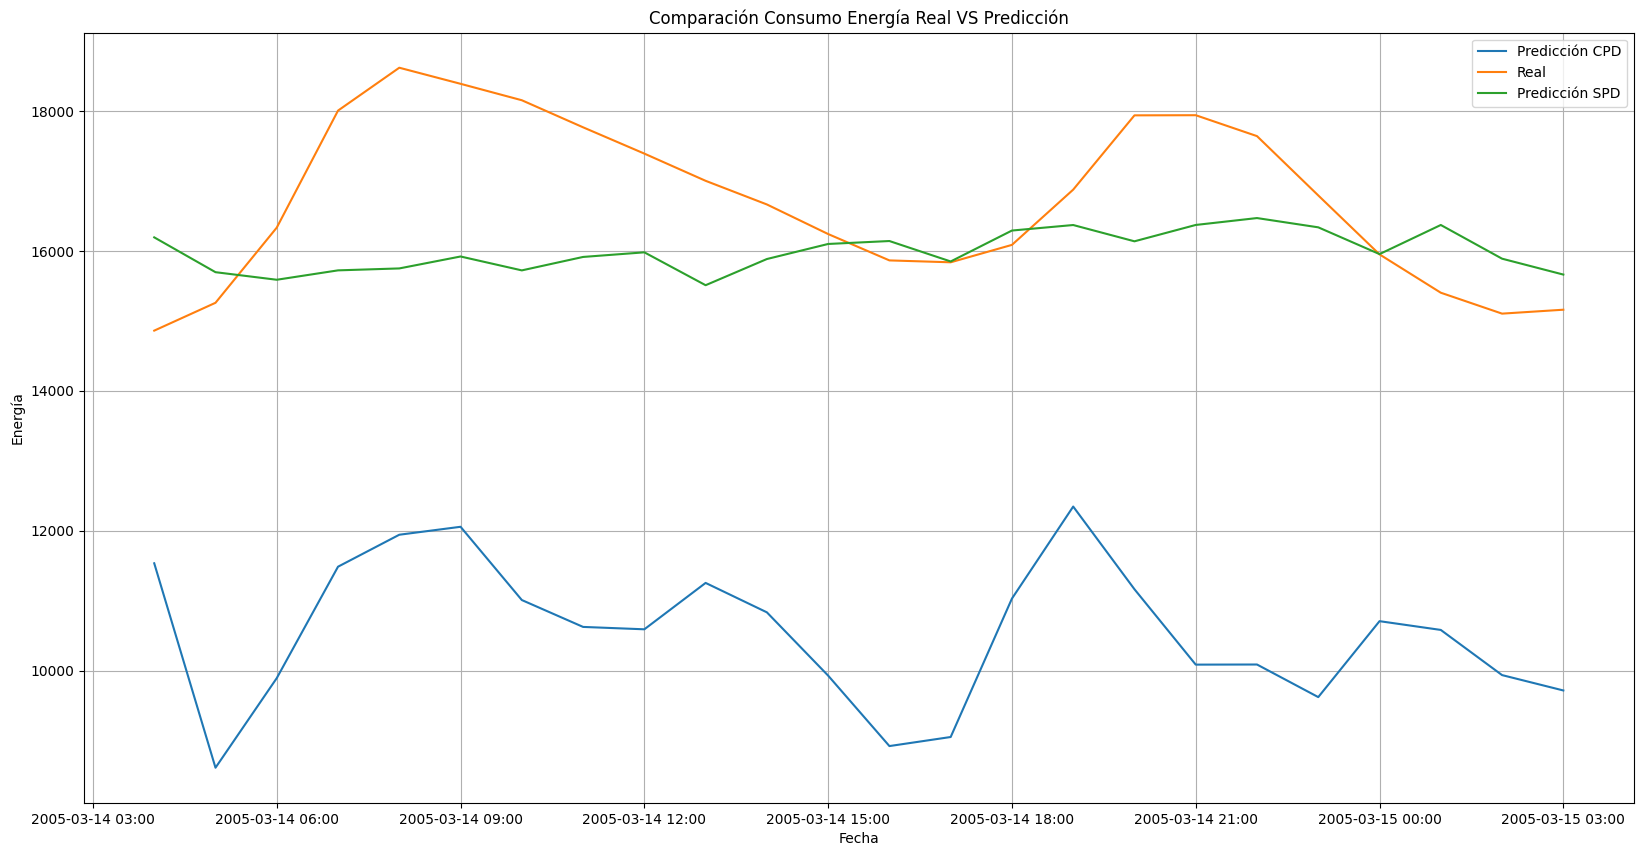

In [27]:

num = 10
plt.figure(figsize=(20,10))
plt.title("Comparación Consumo Energía Real VS Predicción")
#plt.plot(fecha_y_test[num], estandarizacion.inverse_transform(y_test[num]),label = "Real")
plt.plot(fecha_y_testCPD[num],y_hatCPD[num],label = "Predicción CPD")
plt.plot(fecha_y_testCPD[num],y_test1CPD[num],label = "Real")
plt.plot(fecha_y_testCPD[num],y_hatSPD[num],label = "Predicción SPD")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())



plt.ylabel("Energía")
plt.xlabel("Fecha")
plt.grid()
plt.legend()
plt.show()

In [18]:
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy_statement

# Parámetros correctos para la función
epsilon = compute_dp_sgd_privacy_statement(
    number_of_examples = 3760, # Aquí usamos 'num_examples' en lugar de 'n'
    batch_size=batch,
    noise_multiplier=noise_multiplier,
    delta=1e-5,
    num_epochs = epocas
)

print(f"Epsilon: {epsilon}")


Epsilon: DP-SGD performed over 3760 examples with 32 examples per iteration, noise
multiplier 10 for 80 epochs with microbatching, and no bound on number of
examples per user.

This privacy guarantee protects the release of all model checkpoints in addition
to the final model.

Example-level DP with add-or-remove-one adjacency at delta = 1e-05 computed with
RDP accounting:
    Epsilon with each example occurring once per epoch:         9.368
    Epsilon assuming Poisson sampling (*):                      0.655

No user-level privacy guarantee is possible without a bound on the number of
examples per user.

(*) Poisson sampling is not usually done in training pipelines, but assuming
that the data was randomly shuffled, it is believed that the actual epsilon
should be closer to this value than the conservative assumption of an arbitrary
data order.



In [ ]:
from tensorflow_privacy.privacy.analysis.compute_dp_sgd_privacy_lib import compute_dp_sgd_privacy_statement

# Parámetros correctos para la función
epsilon = compute_dp_sgd_privacy_statement(
    number_of_examples = X_train.shape[0], # Aquí usamos 'num_examples' en lugar de 'n'
    batch_size=batch,
    noise_multiplier=noise_multiplier,
    delta=1e-5,
    num_epochs = epocas
)

print(f"Epsilon: {epsilon}")


In [19]:
MAES_CPD

{0: 3774.85,
 1: 6743.69,
 2: 5417.11,
 3: 3786.67,
 4: 3346.06,
 5: 3245.05,
 6: 4250.72,
 7: 4659.03,
 8: 4672.65,
 9: 4027.04,
 10: 4482.43,
 11: 5340.74,
 12: 6372.78,
 13: 6247.83,
 14: 4253.5,
 15: 2892.32,
 16: 4086.19,
 17: 5201.42,
 18: 5185.05,
 19: 5623.16,
 20: 4520.94,
 21: 4634.26,
 22: 5281.56,
 23: 5507.46}

In [20]:
RMSE_CPD

{0: 4071.3611090150184,
 1: 6946.487736259239,
 2: 5667.342443332677,
 3: 4096.963221704584,
 4: 3669.0470452148743,
 5: 3620.328753027824,
 6: 4499.105894508374,
 7: 4982.444196375912,
 8: 4954.5873299398,
 9: 4368.741274097151,
 10: 4807.527031645272,
 11: 5566.177296852841,
 12: 6617.433962647455,
 13: 6506.158128265866,
 14: 4557.948617525213,
 15: 3247.1367156311726,
 16: 4440.000877252165,
 17: 5523.7561414312995,
 18: 5500.7637760587395,
 19: 5907.594463061932,
 20: 4830.568617668111,
 21: 4992.149974710295,
 22: 5628.106587476822,
 23: 5824.6759042885815}

In [21]:
ER_Medianos_CPD

{0: 24.92,
 1: 44.18,
 2: 35.57,
 3: 25.03,
 4: 22.04,
 5: 21.45,
 6: 27.93,
 7: 30.59,
 8: 30.78,
 9: 26.53,
 10: 29.49,
 11: 35.09,
 12: 41.82,
 13: 40.98,
 14: 28.01,
 15: 18.96,
 16: 26.9,
 17: 34.23,
 18: 34.17,
 19: 37.09,
 20: 29.82,
 21: 30.57,
 22: 34.81,
 23: 36.25}

In [22]:
ER_Medios_CPD

{0: 23.86,
 1: 43.45,
 2: 34.71,
 3: 23.96,
 4: 21.09,
 5: 20.41,
 6: 27.05,
 7: 29.75,
 8: 29.83,
 9: 25.56,
 10: 28.57,
 11: 34.24,
 12: 41.07,
 13: 40.25,
 14: 27.08,
 15: 18.21,
 16: 26.02,
 17: 33.42,
 18: 33.33,
 19: 36.25,
 20: 28.96,
 21: 29.72,
 22: 34.03,
 23: 35.55}

In [ ]:
y_hat

# Imprimir todas las predicciones

In [ ]:
fig = plt.figure(figsize=(25, 130))
ax = fig.subplots(14,1)

for i in range(14):
    ax[i].set_title(f'Comparación Consumo Energía Real VS Predicción - {29*i}')
    ax[i].set_xlabel("Fecha")
    ax[i].set_ylabel("Energía")
    ax[i].plot(fecha_y_test[29*(i)],y_hat[29*(i)],label = "Predicción")
    ax[i].plot(fecha_y_test[29*(i)],estandarizacion.inverse_transform(y_test[29*(i)]),label = "Real")
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H'))
    ax[i].xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.setp(ax[i].xaxis.get_majorticklabels(), rotation=15)
    ax[i].legend()
    ax[i].grid()
    
